In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sentence-transformers==0.2.6.1


     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 1.3MB 21.2MB/s 
     |████████████████████████████████| 2.9MB 57.7MB/s 
     |████████████████████████████████| 890kB 44.2MB/s 
     |████████████████████████████████| 1.1MB 51.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=886a4267a55d231de190af88cedd95eaf65ca70ba3daeedd29a5607683881b53
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=7689b5b8c9e557eed47cdf4e3d087708e7281c7ea17ba743caf6458984743655
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_1/" /content/

In [ ]:
!pip install transformers==2.8.0

     |████████████████████████████████| 573kB 19.7MB/s 
     |████████████████████████████████| 133kB 56.1MB/s 
     |████████████████████████████████| 3.7MB 43.3MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 6.8MB 33.1MB/s 
ERROR: botocore 1.19.18 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: tokenizers 0.9.3
    Uninstalling tokenizers-0.9.3:
      Successfully uninstalled tokenizers-0.9.3
  Found existing installation: transformers 3.5.1
    Uninstalling transformers-3.5.1:
      Successfully uninstalled transformers-3.5.1


In [ ]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-emla6xtj
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-emla6xtj
  Created wheel for geoopt: filename=geoopt-0.3.1-cp36-none-any.whl size=73075 sha256=d937866161dcfe129a46da7d5dd9b9b63fcf8fa73d26bee3934c230b8fc6c8d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-s972ssr_/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-8m6jfw7z
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-8m6jfw7z
  Created wheel for hyrnn: filename=hyrnn-0.0.0-cp36-none-any.whl size=13955 sha256=3d1c85d68ef98c2b12cdde79935acb6148dec242e6ee1e700521cbbb2c7bab7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-pv8sdbr_/wheels/24/c3/64/cc0e9d25d466081dc154a2a8843157f54d845b916b4ba66418
Successfully built hyrnn


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_taxonomy_prediction.csv")
val_data = pd.read_csv("validation_taxonomy_prediction.csv")
test_data = pd.read_csv("test_taxonomy_prediction.csv")

train_data


,board_syllabus,question_answer
0,social science>>geography : our environment>>w...,Identify the different processes involved in ...
1,social science>>history : our pasts - iii>>wea...,The word &#39;Chintz&#39; comes from which la...
2,social science>>civics : social and political ...,Which disease is responsible for the deaths o...
3,social science>>civics : social and political ...,Patients usually have to wait for hours in the...
4,science>>components of food,How can deficiency diseases be prevented? Def...
...,...,...
40890,science>>synthetic fibres and plastics,Name the monomer of polyester. Ester
40891,physics>>physics : part - ii>>ray optics and o...,"A convex lens and a concave lens, each having..."
40892,social science>>history : india and the contem...,Peasants who opposed collectivisation and res...
40893,"science>>garbage in, garbage out",Cancer is one of the fatal diseases causeddue...


In [ ]:
from google.colab import files

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
train_data["board_syllabus"].value_counts()

science                                                                      493
science>>sound                                                               364
science>>life processes                                                      285
science>>acids, bases and salts                                              281
computer science>>introduction to computer                                   254
                                                                            ... 
social science>>civics : social and political life-i>>what is government?     85
physical science>>physical science (physics)>>force>>force                    83
physics>>physics : part - ii>>oscillations                                    83
social science>>the mauryan empire>>the mauryan empire                        82
science>>light, shadows and reflections                                       82
Name: board_syllabus, Length: 312, dtype: int64

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [ ]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [ ]:
# get_labels(330)

In [ ]:
# train_data = pd.concat([train_data,val_data])
# train_data

In [ ]:
val_data

,board_syllabus,question_answer
0,science>>diversity in living organisms,Coelenterates shows two body forms.
1,"computer science[c++]>>linked lists, stacks an...",The following function is supposed to return ...
2,social science>>geography : the earth our habi...,The plains are known as food baskets. Why? Th...
3,science>>sound,The amount of sound energy passing each second...
4,science>>respiration in organisms,"When we breathe out, the concentration of wat..."
...,...,...
2148,physics>>physics : part - i>>units and measure...,(A)Add to correct significant figure? (B) Fin...
2149,science>>separation of substances,Explain the process of sieving. Sieving is us...
2150,social science>>history : our pasts - i>>build...,This is a cave painting . Answer the followin...
2151,"science>>acids, bases and salts","What are Acid, Base &amp; Salts? jjhkhjkhjkhj..."


In [ ]:
train_features = train_data["question_answer"]
test_features = test_data["question_answer"]
train_labels = train_data["board_syllabus"]
test_labels = test_data["board_syllabus"]
val_features = val_data["question_answer"]
val_labels = val_data["board_syllabus"]

In [ ]:
train_labels.value_counts()

science                                                                      493
science>>sound                                                               364
science>>life processes                                                      285
science>>acids, bases and salts                                              281
computer science>>introduction to computer                                   254
                                                                            ... 
social science>>civics : social and political life-i>>what is government?     85
physical science>>physical science (physics)>>force>>force                    83
physics>>physics : part - ii>>oscillations                                    83
social science>>the mauryan empire>>the mauryan empire                        82
science>>light, shadows and reflections                                       82
Name: board_syllabus, Length: 312, dtype: int64

In [ ]:
test_labels.value_counts()

science                                                                                        54
science>>sound                                                                                 41
computer science>>introduction to computer                                                     37
computer science[c++]>>boolean algebra                                                         35
chemistry>>chemistry : part i>>surface chemistry                                               33
                                                                                               ..
social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife     6
social science>>india from 600 bc - 400 bc>>jainism and buddhism                                5
social science>>geography : contemporary india - ii>>forest and wildlife resources              5
social science>>civics : social and political life>>the indian constitution                     5
science>>reproductio

In [ ]:

question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array([' Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only',
       ' The word &#39;Chintz&#39; comes from which language? Hindi',
       ' Which disease is responsible for the deaths of 5 lakh people in India? Tuberculosis',
       ...,
       ' Peasants who opposed collectivisation and resisted the authorities were: deported and exiled',
       ' Cancer is one of the fatal diseases causeddue tothe harmful gases released during burning of plastic.',
       ' Fill in the blanks : (a) The process of transferring of charge from a charged object to the earth is called _____________. (b) The process of electric discharge can occur between two or more_______, or between ________ and the __________. (c) The uppermost layer of the earth called the _________. (a) E arthing (b) Clouds, clouds ,earth (c) C rust'],
      dtype=object)

In [ ]:
categories

array(['social science>>geography : our environment>>water',
       'social science>>history : our pasts - iii>>weavers, iron smelter & factory owners',
       'social science>>civics : social and political life - ii>>role of the government in health',
       ...,
       'social science>>history : india and the contemporary world - i>>socialism in europe and the russian revolution',
       'science>>garbage in, garbage out',
       'science>>some natural phenomena'], dtype=object)

In [ ]:
# val_features = test_features.values
# val_labels = test_labels.values

In [ ]:

import numpy as np
!pip install inflection

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors
import inflection

from nltk.stem import PorterStemmer 
ps = PorterStemmer()
from gzip import open as gopen
from pandas.core.common import flatten
import gensim.models.poincare as poincare
def get_cleaned_taxonomy(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = ' '.join(value.split(">>"))
      # taxonomy_words = [inflection.singularize(val)  for token in value for val in token.split(" ") if val.isalpha()]
      cleaned_taxonomy.append( value )
  return cleaned_taxonomy

In [ ]:

# course_taxonomy

poincare_emb_data = get_cleaned_taxonomy(categories)
poincare_val = get_cleaned_taxonomy(val_labels)

In [ ]:
poincare_emb_data[2]

'social science civics : social and political life - ii role of the government in health'

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')

100%|██████████| 1.24G/1.24G [00:43<00:00, 28.5MB/s]


In [ ]:
# taxonomy_vectors = []
taxonomy_vectors = model.encode(poincare_emb_data)
# taxonomy_vectors = np.vstack(taxonomy_vectors)


In [ ]:
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(40895, 1024)

In [ ]:
# taxonomy_vectors_val = []
# for feature in poincare_val:
taxonomy_vectors_val = model.encode(poincare_val)
taxonomy_vectors_val = np.vstack(taxonomy_vectors_val)
taxonomy_vectors_val.shape

(2153, 1024)

In [ ]:
test_data

,board_syllabus,question_answer
0,physics>>physics : part - ii,(a) Describe a simple experiment (or activity...
1,social science>>geography : the earth our habi...,What is the average weather in a place over m...
2,science>>diversity in living organisms,Which of the following is correct for the cha...
3,physics>>physics : part - i>>physical world,The branch of Physics that deals with the mic...
4,social science>>history : our pasts - iii>>tri...,Why did tribals view traders as a major cause...
...,...,...
4779,political science>>political science : indian ...,Which one of the following is not true about ...
4780,science>>tissues,Which of the following is a fluid matrix of t...
4781,computer science[c++]>>programming methodology,Program formatting has more effect when a con...
4782,chemistry>>chemistry : part i>>solutions,Cryoscopic constant is related to depression i...


In [ ]:
train_data

,board_syllabus,question_answer
0,social science>>geography : our environment>>w...,Identify the different processes involved in ...
1,social science>>history : our pasts - iii>>wea...,The word &#39;Chintz&#39; comes from which la...
2,social science>>civics : social and political ...,Which disease is responsible for the deaths o...
3,social science>>civics : social and political ...,Patients usually have to wait for hours in the...
4,science>>components of food,How can deficiency diseases be prevented? Def...
...,...,...
40890,science>>synthetic fibres and plastics,Name the monomer of polyester. Ester
40891,physics>>physics : part - ii>>ray optics and o...,"A convex lens and a concave lens, each having..."
40892,social science>>history : india and the contem...,Peasants who opposed collectivisation and res...
40893,"science>>garbage in, garbage out",Cancer is one of the fatal diseases causeddue...


In [ ]:
set(train_data["question_answer"].values).intersection(set(test_data["question_answer"].values))

set()

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only
Token IDs: tensor([  101,  6709,  1996,  2367,  6194,  2920,  1999,  1996,  1004,  1001,
         4464,  1025,  2300,  5402,  1004,  1001,  4464,  1025,  2013,  1996,
         7047,  2445,  2917,  1012,  1045,  1012,  9345, 17822,  3370,  2462,
         1012, 24707,  3619,  3370,  3523,  1012,  4942, 17960,  3370,  4921,
         1012, 13511,  1045,  1010,  2462,  1998,  4921,  2069,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only
Token IDs: tensor([  101,  6709,  1996,  2367,  6194,  2920,  1999,  1996,  1004,  1001,
         4464,  1025,  2300,  5402,  1004,  1001,  4464,  1025,  2013,  1996,
         7047,  2445,  2917,  1012,  1045,  1012,  9345, 17822,  3370,  2462,
         1012, 24707,  3619,  3370,  3523,  1012,  4942, 17960,  3370,  4921,
         1012, 13511,  1045,  1010,  2462,  1998,  4921,  2069,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           

In [ ]:
num_classes = len(list(set(categories)))
num_classes

312

In [ ]:
from torch.utils.data import TensorDataset, random_split
train_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)
val_poincare_tensor = torch.tensor(taxonomy_vectors_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_poincare_tensor)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_poincare_tensor)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
# !pip install transformers==2.8.0
import transformers
print(transformers.__version__)

2.8.0


In [ ]:
set(question_answer).intersection(set(test_features))

set()

In [ ]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint

from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import torch.nn.functional as F

import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
# Neural Classifierwork
class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 384)
        self.fc2 = nn.Linear(384, 1024)

    def forward(self,tokens,masks):
        _, pooled_output = self.bert(tokens, attention_mask=masks)
        x = self.fc1(pooled_output)
        x = self.fc2(x)
        return x

class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin
    # def forward_val(self, output, target):
    #     cos = nn.CosineSimilarity(dim=0, eps=1e-6)
    #     loss = 0
    #     num_compare = 4
    #     count = 0
    #     for i in range(len(output)):
    #         v_image = output[i]
    #         t_label = target[i]
    #         for j in range(num_compare):
    #             if j != i:
    #                 count += 1
    #                 t_j = target[j]
    #                 loss += torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
    #     return loss / count

    def forward(self, output, target):
        loss=0
        for i in range(len(output)):
            v_image = F.normalize(output[i],p=2,dim=0)
            t_label = F.normalize(target[i],p=2,dim=0)
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = F.normalize(target[j],p=2,dim=0)
            loss+= torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
        return loss / len(output)



In [ ]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
# model.load_state_dict(torch.load('model_euclidean_SENT_BERT/model_weights'))

# Tell pytorch to run this model on the GPU.
model.cuda()


MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# mobius_params = []
# bert_params = []

# def mobius_params():
#   for param in model.named_parameters():
#     if 'fc' in param[0]:
#       yield param[1]
# def bert_params():
#   for param in model.named_parameters():
#     if 'bert' in param[0]:
#       yield param[1]


In [ ]:
optimizer_1 = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
# optimizer_2 = radam_.RiemannianAdam(mobius_params(), lr=0.01, stabilize=10)

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

1278

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer_1, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
criterion = MyHingeLoss(0.1)


In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=6, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad() 
        optimizer_1.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask)
        
        loss = criterion.forward(logits,b_labels)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask)
          
        loss = criterion(logits,b_labels)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy().round()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_euclidean_SENT_BERT_cos_1/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_SENT_BERT_cos_1"
    !mv model_euclidean_SENT_BERT_cos_1 "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...

======== Epoch 1 / 30 ========
Training...
  Batch    40  of  1,278.    Elapsed: 0:00:31.
  Batch    40  of  1,278.    Elapsed: 0:00:31.
  Batch    80  of  1,278.    Elapsed: 0:01:02.
  Batch    80  of  1,278.    Elapsed: 0:01:02.
  Batch   120  of  1,278.    Elapsed: 0:01:34.
  Batch   120  of  1,278.    Elapsed: 0:01:34.
  Batch   160  of  1,278.    Elapsed: 0:02:06.
  Batch   160  of  1,278.    Elapsed: 0:02:06.
  Batch   200  of  1,278.    Elapsed: 0:02:38.
  Batch   200  of  1,278.    Elapsed: 0:02:38.
  Batch   240  of  1,278.    Elapsed: 0:03:10.
  Batch   240  of  1,278.    Elapsed: 0:03:10.
  Batch   280  of  1,278.    Elapsed: 0:03:43.
  Batch   280  of  1,278.    Elapsed: 0:03:43.
  Batch   320  of  1,278.    Elapsed: 0:04:16.
  Batch   320  of  1,278.    Elapsed: 0:04:16.
  Batch   360  of  1,278.    Elapsed: 0:04:49.
  Batch   360  of  1,278.    Elapsed: 0:04:49.
  Batch   400  of  1,278.    Elapsed: 0:05:22.
  Batch   400  of  

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,2.04e-02,1.16e-02,0:17:24,0:00:20
2,9.96e-03,9.32e-03,0:17:27,0:00:20
3,7.86e-03,6.72e-03,0:17:21,0:00:19
4,6.37e-03,6.31e-03,0:17:16,0:00:19
5,5.59e-03,6.09e-03,0:17:15,0:00:19
6,4.85e-03,4.85e-03,0:17:14,0:00:19
7,4.44e-03,5.23e-03,0:17:12,0:00:18
8,4.19e-03,4.89e-03,0:17:10,0:00:18
9,3.84e-03,5.55e-03,0:17:11,0:00:18


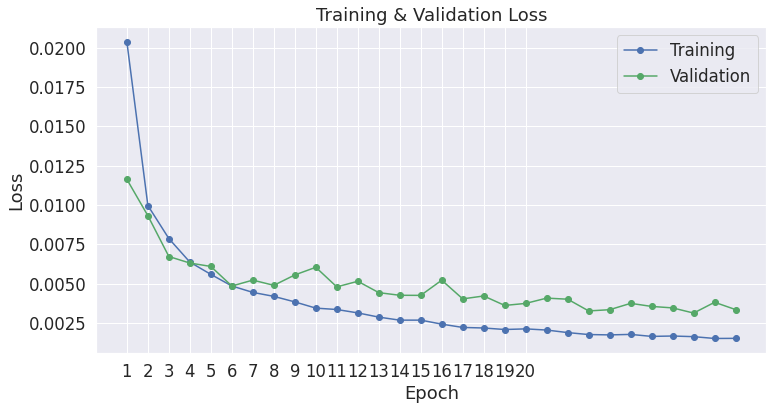

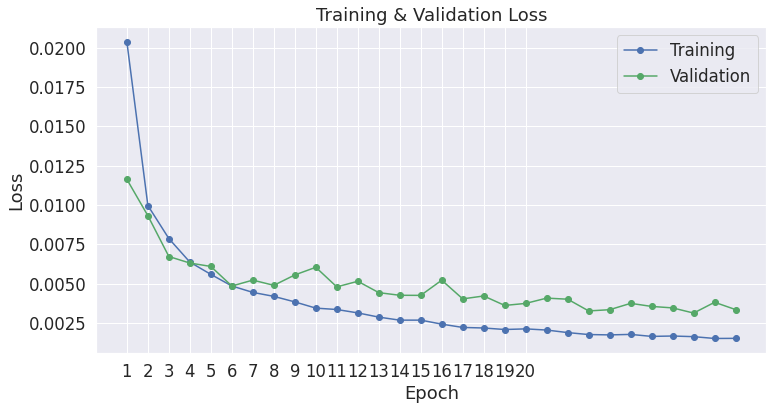

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_euclidean_SENT_BERT_cos_1/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_euclidean_SENT_BERT_cos_1/


('model_euclidean_SENT_BERT_cos_1/vocab.txt',
 'model_euclidean_SENT_BERT_cos_1/special_tokens_map.json',
 'model_euclidean_SENT_BERT_cos_1/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r model_euclidean_SENT_BERT_cos_1.zip model_euclidean_SENT_BERT_cos_1
# files.download('model_euclidean_1.zip')

  adding: model_euclidean_SENT_BERT_cos_1/ (stored 0%)
  adding: model_euclidean_SENT_BERT_cos_1/tokenizer_config.json (stored 0%)
  adding: model_euclidean_SENT_BERT_cos_1/vocab.txt (deflated 53%)
  adding: model_euclidean_SENT_BERT_cos_1/special_tokens_map.json (deflated 40%)
  adding: model_euclidean_SENT_BERT_cos_1/model_weights (deflated 7%)


In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

In [ ]:
test_features = test_features.values
labels = test_labels.values

In [ ]:
test_features

array([' (a) Describe a simple experiment (or activity) to show that the polarity of emf induced in a coil is always such that it tends to produce a current which opposes the change of magnetic flux that produces it. (b) The current flowing through an inductor of self inductance L is continuously increasing. Plot a graph showing the variation of (i) Magnetic flux versus the current (ii) Induced emf versus dI/dt (iii) Magnetic potential energy stored versus the current. /* Style Definitions */ table.MsoNormalTable {mso-style-name:"Table Normal"; mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes; mso-style-priority:99; mso-style-qformat:yes; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in 5.4pt; mso-para-margin-top:0in; mso-para-margin-right:0in; mso-para-margin-bottom:10.0pt; mso-para-margin-left:0in; line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt; font-family:"Calibri","sans-serif"; mso-ascii-font-family:Calibri; mso-ascii-theme-font:minor-l

In [ ]:
labels

array(['physics>>physics : part - ii',
       'social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife',
       'science>>diversity in living organisms', ...,
       'computer science[c++]>>programming methodology',
       'chemistry>>chemistry : part i>>solutions',
       'science>>periodic classification of elements'], dtype=object)

In [ ]:
len(list(set(labels)))

312

In [ ]:
len(list(set(train_data["board_syllabus"].values)))

312

In [ ]:

# course_taxonomy
test_labels = list(set(test_data["board_syllabus"].values))
emb_data_test = get_cleaned_taxonomy(test_labels)

In [ ]:
from sentence_transformers import SentenceTransformer
sent_model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')

100%|██████████| 1.24G/1.24G [00:40<00:00, 30.6MB/s]


In [ ]:
# taxonomy_vectors = []""
taxonomy_vectors = sent_model.encode(emb_data_test)
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(312, 1024)

In [ ]:
model = MulticlassClassifier('bert-base-uncased')
model.load_state_dict(torch.load('model_euclidean_SENT_BERT_cos_1/model_weights'))
model.cuda()

MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)


In [ ]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
test_labels.shape

(312,)

In [ ]:
torch.topk(dist_without_grad(model2(test_input_ids[0].to('cuda').reshape(1,-1),test_attention_masks[0].to('cuda').reshape(1,-1)),test_poincare_tensor),3,largest=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.return_types.topk(values=tensor([3.1841, 3.1841, 3.1841], device='cuda:0', grad_fn=<TopkBackward>), indices=tensor([839, 682,  15], device='cuda:0'))

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)

predictions_1 , true_labels_1= [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model2(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
  max_distance =0
  label=None
  for index,test_poincare in enumerate(test_poincare_tensor):

    distance = cos(test_poincare, outputs.squeeze())
    if distance > max_distance:
      max_distance = distance
      label = index
  predictions_1.append(labels[label])
    
# Predict 
# for batch in prediction_dataloader:
#   # Add batch to GPU
#   batch = tuple(t.to(device) for t in batch)
  
#   # Unpack the inputs from our dataloader
#   b_input_ids, b_input_mask, b_labels = batch
  
#   # Telling the model not to compute or store gradients, saving memory and 
#   # speeding up prediction
#   with torch.no_grad():
#       # Forward pass, calculate logit predictions
#       outputs = model(b_input_ids,b_input_mask)

#   logits = outputs
#   for logit in logits:
#     max_similarity = 0


#   # Move logits and labels to CPU
#   logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
#   # Store predictions and true labels
#   predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 2,664 test sentences...


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


    DONE.


In [ ]:
def precision(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [ ]:
test_data['board_syllabus'][20]

'computer science[c++]>>c++ revision tour'

TypeError: ignored

In [ ]:
predictions=[]
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
outputs = model(input_ids[20].reshape(1,-1),attention_masks[20].reshape(1,-1))
test_poincare_tensor = test_poincare_tensor.to('cuda')
distances = (F.normalize(outputs,p=2,dim=1) - F.normalize(test_poincare_tensor,p=2,dim=1)).pow(2).sum(1)
print("distances",torch.topk(distances,3,largest=False))
print(outputs.shape,test_poincare_tensor.shape)
print(cos(outputs,test_poincare_tensor).shape)
print(torch.topk(cos(outputs,test_poincare_tensor),5,largest=True))
predictions.append(test_labels[indices.cpu().numpy()])
predictions

distances torch.return_types.topk(
values=tensor([1.1455, 1.1635, 1.2580], device='cuda:0', grad_fn=<TopkBackward>),
indices=tensor([149, 310, 333], device='cuda:0'))
torch.Size([1, 700]) torch.Size([335, 700])
torch.Size([335])
torch.return_types.topk(
values=tensor([0.4272, 0.4182, 0.3710, 0.3655, 0.3589], device='cuda:0',
       grad_fn=<TopkBackward>),
indices=tensor([149, 310, 333, 289, 292], device='cuda:0'))


[array(['science>>tissues', 'science>>control and coordination', 'science',
        'science>>forests: our lifeline',
        'science>>reaching the age of adolescence', 'science>>gravitation',
        'science>>acids, bases and salts', 'science>>force and pressure',
        'science>>water', 'science>>soil', 'science>>why do we fall ill?',
        'science>>body movements', 'science>>getting to know plants',
        'science>>light', 'science>>life processes', 'science>>sound',
        'science>>heat', 'science>>friction',
        'science>>garbage in, garbage out', 'science>>fibre to fabric'],
       dtype='<U116')]

In [ ]:
test_poincare_tensor.shape

torch.Size([312, 1024])

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
predictions , true_labels = [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
    
  distances = cos(outputs,test_poincare_tensor)#torch.topk(cos(outputs,test_poincare_tensor),20,largest=True)
  distances,indices = torch.topk(distances,15,largest=True)
  predictions.append(test_labels[indices.cpu().numpy()])
print(len(predictions))
  # max_distance =100000000000000
  # label=None
  # for index,test_poincare in enumerate(test_poincare_tensor):

  #   distance = distanceTo(test_poincare, outputs)
  #   if distance < max_distance:
  #     max_distance = distance
  #     label = index
  # predictions.append(labels[label])
    
# Predict 
# for batch in prediction_dataloader:
#   # Add batch to GPU
#   batch = tuple(t.to(device) for t in batch)
  
#   # Unpack the inputs from our dataloader
#   b_input_ids, b_input_mask, b_labels = batch
  
#   # Telling the model not to compute or store gradients, saving memory and 
#   # speeding up prediction
#   with torch.no_grad():
#       # Forward pass, calculate logit predictions
#       outputs = model(b_input_ids,b_input_mask)

#   logits = outputs
#   for logit in logits:
#     max_similarity = 0


#   # Move logits and labels to CPU
#   logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
#   # Store predictions and true labels
#   predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')
# predictions

Predicting labels for 4,784 test sentences...
4784
    DONE.


In [ ]:
labels

array(['physics>>physics : part - ii',
       'social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife',
       'science>>diversity in living organisms', ...,
       'computer science[c++]>>programming methodology',
       'chemistry>>chemistry : part i>>solutions',
       'science>>periodic classification of elements'], dtype=object)

In [ ]:
!pip install tensorflow==1.13.1
! pip install tensorflow-hub==0.7.0

     |████████████████████████████████| 92.5MB 97kB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 3.2MB 50.4MB/s 
     |████████████████████████████████| 368kB 57.6MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 92kB 7.7MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [ ]:
labels=test_data['board_syllabus'].values

In [ ]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
labels = LE.fit_transform(labels)
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [ ]:
len(final_predictions[-1])

20

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 20) (4784,)
update_recall:  0.9650919732441472
recall 0.9650919732441472
STREAM_VARS:  [4617.0, 167.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[301, 166, 118, ...,  67,  66,   0],
       [251, 248, 246, ..., 221, 176,  88],
       [171, 170, 162, ..., 103, 102, 100],
       ...,
       [114,  55,  54, ...,  33,  32,  29],
       [158, 109,  76, ...,   6,   2,   0],
       [203, 179, 169, ...,  13,  11,   3]]), indices=array([[13, 19,  9, ...,  2,  0, 14],
       [13, 14, 12, ...,  3,  1, 18],
       [ 8, 17,  0, ...,  9,  7,  4],
       ...,
       [12,  5,  8, ..., 16, 10,  6],
       [17, 12,  6, ...,  9,  2, 10],
       [10,  4,  8, ..., 17, 16,  3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 15) (4784,)
precision 0.06339186176142698
update_recall:  0.9508779264214047
recall 0.9508779264214047
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4549.0, 235.0, 4549.0, 67211.0]
TMP_RANK:  TopKV2(values=array([[301, 118, 100, ...,  67,  66,   0],
       [251, 248, 246, ..., 222, 221, 176],
       [171, 162, 159, ..., 103, 102, 100],
       ...,
       [114,  55,  54, ...,  35,  32,  29],
       [109,  76,  73, ...,   6,   2,   0],
       [203, 179, 169, ..., 103,  64,   3]]), indices=array([[13,  9,  7, ...,  2,  0, 14],
       [13, 14, 12, ...,  4,  3,  1],
       [ 8,  0, 13, ...,  9,  7,  4],
       ...,
       [12,  5,  8, ...,  2, 10,  6],
       [12,  6, 14, ...,  9,  2, 10],
       [10,  4,  8, ...,  1,  7,  3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 10) (4784,)
precision 0.09289297658862876
update_recall:  0.9289297658862876
recall 0.9289297658862876
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4444.0, 340.0, 4444.0, 43396.0]
TMP_RANK:  TopKV2(values=array([[118, 100,  77, ...,  68,  67,  66],
       [243, 241, 237, ..., 222, 221, 176],
       [171, 162, 155, ..., 103, 102, 100],
       ...,
       [ 55,  54,  52, ...,  41,  35,  29],
       [ 76,  70,  24, ...,   8,   6,   2],
       [179, 169, 166, ..., 103,  64,   3]]), indices=array([[9, 7, 4, ..., 1, 2, 0],
       [0, 7, 2, ..., 4, 3, 1],
       [8, 0, 6, ..., 9, 7, 4],
       ...,
       [5, 8, 9, ..., 3, 2, 6],
       [6, 7, 5, ..., 0, 9, 2],
       [4, 8, 2, ..., 1, 7, 3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 5) (4784,)
precision 0.17065217391304346
update_recall:  0.8532608695652174
recall 0.8532608695652174
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 4082.0, 702.0, 4082.0, 19838.0]
TMP_RANK:  TopKV2(values=array([[ 77,  70,  68,  67,  66],
       [243, 237, 222, 221, 176],
       [162, 133, 131, 116, 100],
       ...,
       [ 49,  43,  42,  41,  35],
       [ 15,  10,   9,   8,   2],
       [179, 166, 152, 103,   3]]), indices=array([[4, 3, 1, 2, 0],
       [0, 2, 4, 3, 1],
       [0, 3, 2, 1, 4],
       ...,
       [0, 1, 4, 3, 2],
       [1, 3, 4, 0, 2],
       [4, 2, 0, 1, 3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
precision 0.5296822742474916
update_recall:  0.5296822742474916
recall 0.5296822742474916
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2534.0, 2250.0, 2534.0, 2250.0]
TMP_RANK:  TopKV2(values=array([[ 66],
       [243],
       [162],
       ...,
       [ 49],
       [  8],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
y_true = np.array(labels)
final_predictions = np.array(final_predictions).squeeze()
final_predictions.shape
len(final_predictions[final_predictions==y_true])/len(labels)

0.3918918918918919

In [ ]:
categories